In [1]:
from nbhelper import *

This notebook presents some exploration and visualisation on two datasets. One was collected during the a pointing in VR experiment. 12 participants were asked to reach for a target in VR without real feedback. The end position of the reaching motion is recorded. The second experiment is also a pointing experiment in VR but the visual feedback is manipulated so as to create the illusion of several targets being present in the scene. The positive and negative angles until which the illusion is believable are recorded.

The main idea behind these two datasets is to describe a relationship between the pointing behaviours of participants and their ability to discriminate against optical illusions.

In other words, it is a regression task where we are looking for the relationship:
$$
y = f(x)
$$
where $y$ is the maximum deviation angle for successful optical illusions and $x$ is the user raw pointing performance.

# Read data

In [2]:
df0 = pd.read_csv('./data/Data1stExpe.csv')

In [3]:
df0.columns = ['user', 'condition', 'target', 'trial', 'tx', 'ty', 'px', 'py']

In [4]:
df0.head()

,user,condition,target,trial,tx,ty,px,py
0,1,1,1,1,-0.000048,0.12282,-0.011949,0.13624
1,1,1,1,2,-0.000048,0.12282,-0.016144,0.13269
2,1,1,1,3,-0.000048,0.12282,-0.020195,0.15089
3,1,1,1,4,-0.000033,0.12282,-0.010126,0.12829
4,1,1,1,5,-0.000033,0.12282,-0.016444,0.12576


In [5]:
df1 = pd.read_csv('./data/Data2ndExpe.csv')

In [6]:
df1.columns = ['user', 'target', 'a-', 'a+']

In [7]:
df1.head()

,user,target,a-,a+
0,1,1,-0.079151,0.018782
1,1,2,-0.057142,0.010565
2,1,3,-0.050158,-0.017874
3,1,4,-0.072195,0.026864
4,2,1,-0.124420,-0.038749


# all data from experiment #1

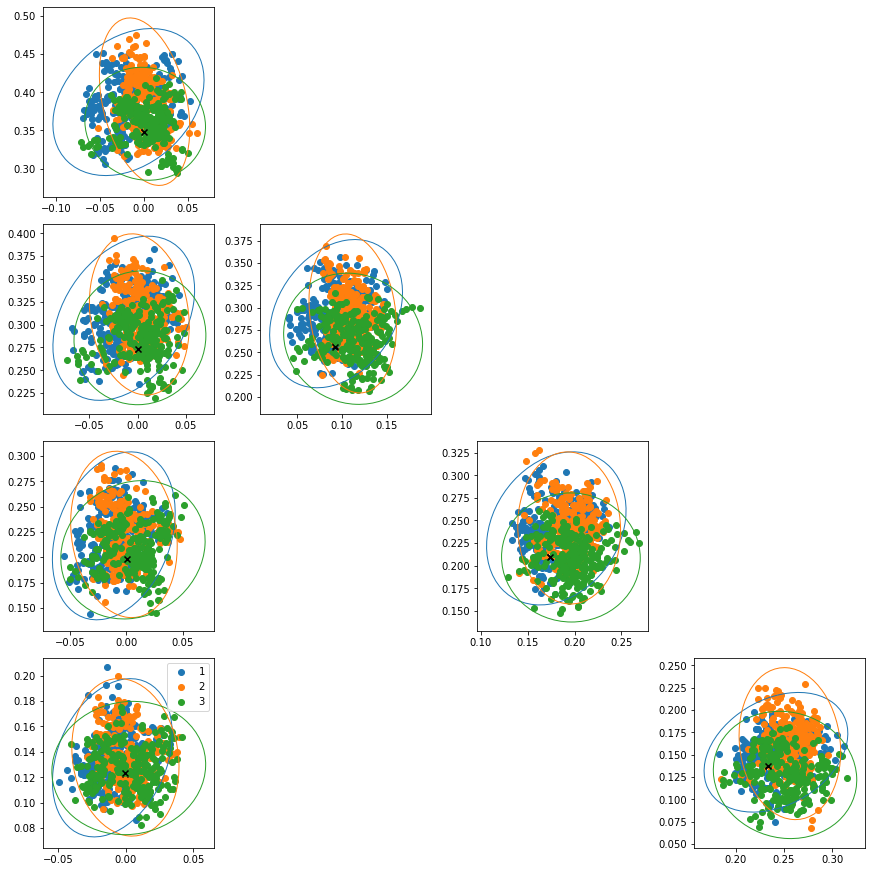

In [8]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,12))
spec2 = gridspec.GridSpec(ncols=4, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[3, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[0, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[2, 2])
f2_ax7 = fig2.add_subplot(spec2[3, 3])
axs = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5, f2_ax6, f2_ax7]

for i, (j, grp) in enumerate(df0.groupby(['target', 'condition'])):
    target = j[0]
    condition = j[1]
    
    scatter = axs[target-1].scatter(grp['px'], grp['py'], label=grp['condition'].iloc[0])
    axs[target-1].scatter(grp['tx'].mean(), grp['ty'].mean(), c='k', marker='x')
    
    color = scatter.to_rgba(0)
    confidence_ellipse(grp['px'], grp['py'], axs[target-1], edgecolor=default_colors[condition-1])
    
axs[0].legend()

# Is there a learing effect in the data?

We can wonder whether there is an effect of trial on the pointing behaviour of users, or if we can safely take the mean of end positions.

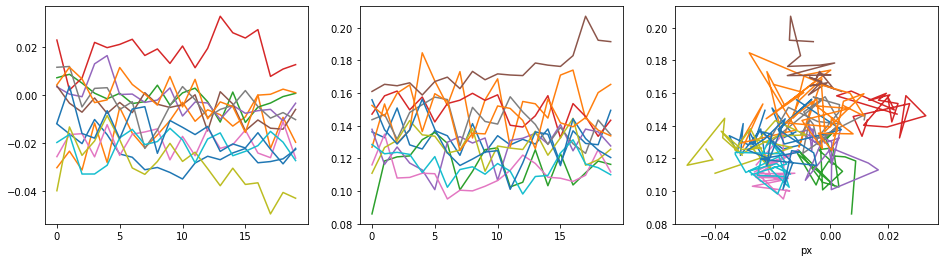

In [9]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

for i, grp in df0.groupby(['target', 'condition', 'user']):
    target = i[0]
    condition = i[1]
    
    if (target == 1) and (condition == 1):
        grp.plot(y='px', use_index=False, ax=ax[0], legend=False)
        grp.plot(y='py', use_index=False, ax=ax[1], legend=False)
        grp.plot(x='px', y='py', ax=ax[2], legend=False)

I do not have a definitive answer for this question but it might be useful to think about it. 

# user dependent effects in pointing

In [10]:
# deviation from target
dx = df0.groupby(['target', 'condition', 'user']).apply(lambda x: x['px'].mean() - x['tx'].mean())
dy = df0.groupby(['target', 'condition', 'user']).apply(lambda x: x['py'].mean() - x['ty'].mean())

# dispersion from target
vx = df0.groupby(['target', 'condition', 'user']).apply(lambda x: np.cov(x[['px', 'py']].T)[0,0])
vy = df0.groupby(['target', 'condition', 'user']).apply(lambda x: np.cov(x[['px', 'py']].T)[1,1])
cxy = df0.groupby(['target', 'condition', 'user']).apply(lambda x: np.cov(x[['px', 'py']].T)[0,1])

In [11]:
data0 = pd.concat([dx, dy, vx, vy, cxy], axis=1)
data0.columns=['dx', 'dy', 'vx', 'vy', 'cxy']
data0 = data0.reset_index()

In [12]:
data0.head()

,target,condition,user,dx,dy,vx,vy,cxy
0,1,1,1,-0.024262,0.009825,0.000043,0.000071,0.000006
1,1,1,2,-0.014780,0.031079,0.000083,0.000294,0.000048
2,1,1,3,-0.000615,-0.006961,0.000027,0.000157,-0.000019
3,1,1,4,0.018119,0.026791,0.000059,0.000080,-0.000004
4,1,1,5,-0.001510,0.004122,0.000048,0.000117,-0.000029


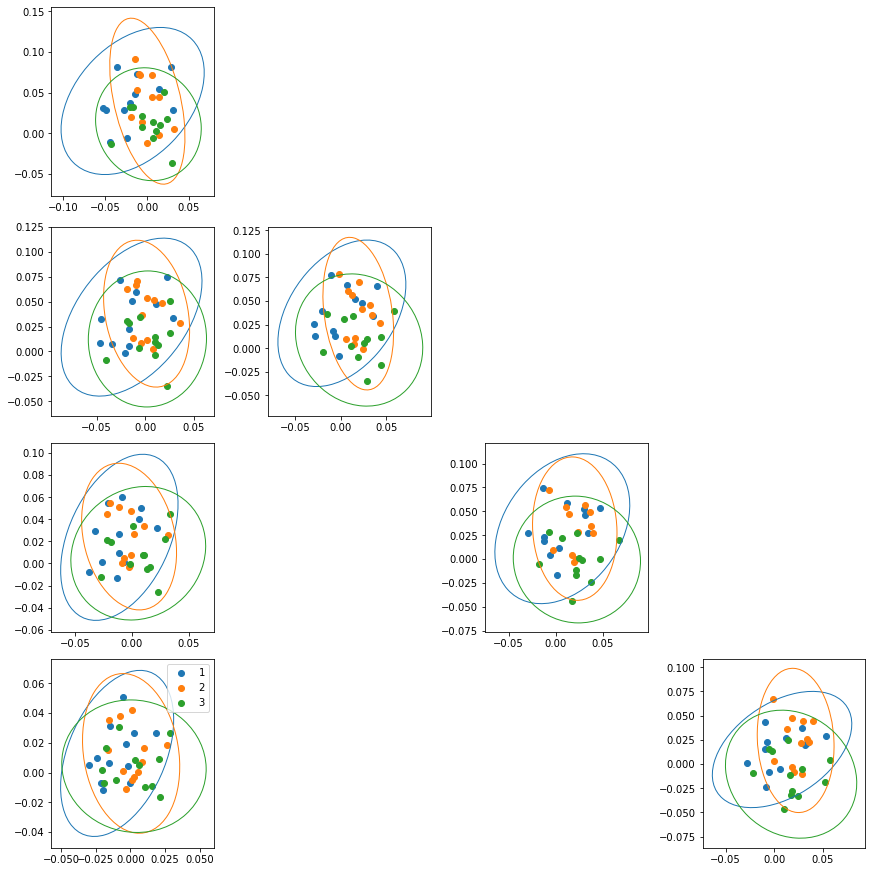

In [13]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,12))
spec2 = gridspec.GridSpec(ncols=4, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[3, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[0, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[2, 2])
f2_ax7 = fig2.add_subplot(spec2[3, 3])
axs = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5, f2_ax6, f2_ax7]

for i, (j, grp) in enumerate(data0.groupby(['target', 'condition'])):
    target = j[0]
    condition = j[1]
    
    scatter = axs[target-1].scatter(grp['dx'], grp['dy'], label=grp['condition'].iloc[0])
#     axs[target-1].scatter(grp['tx'].mean(), grp['ty'].mean(), c='k', marker='x')
    
    color = scatter.to_rgba(0)
    confidence_ellipse(grp['dx'], grp['dy'], axs[target-1], edgecolor=default_colors[condition-1])
    
axs[0].legend()

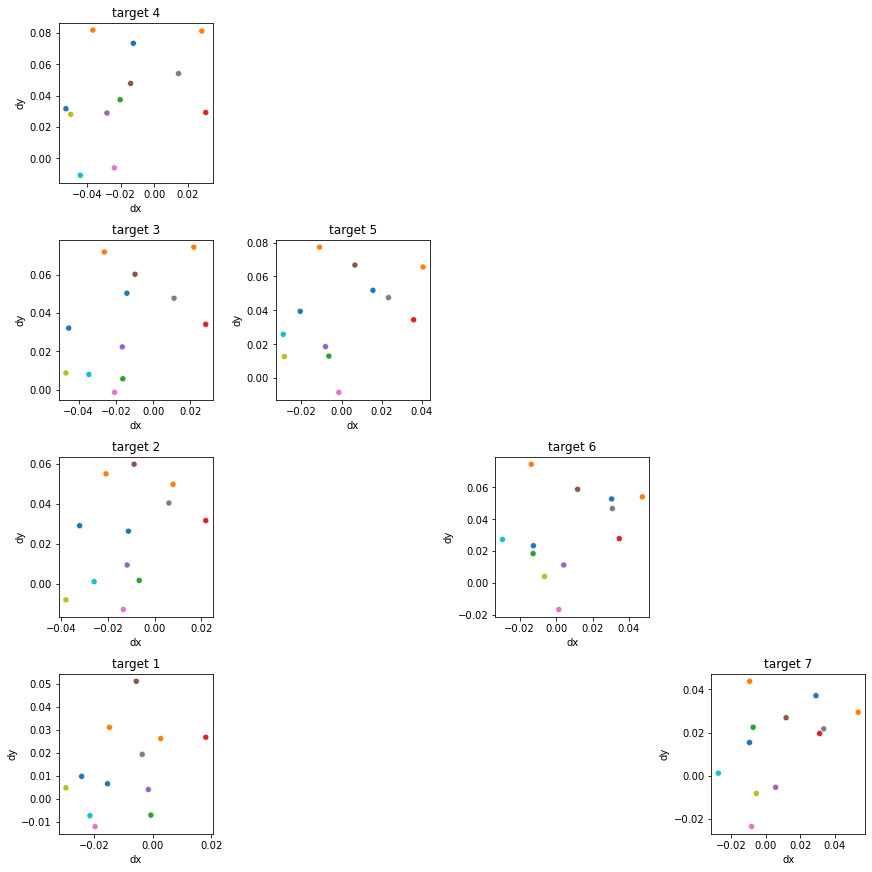

In [30]:
fig2 = plt.figure(constrained_layout=True, figsize=(12,12))
spec2 = gridspec.GridSpec(ncols=4, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[3, 0])
f2_ax2 = fig2.add_subplot(spec2[2, 0])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[0, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[2, 2])
f2_ax7 = fig2.add_subplot(spec2[3, 3])
axs = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5, f2_ax6, f2_ax7]

for i, (j, grp) in enumerate(data0.groupby(['target', 'condition'])):
    target = j[0]
    condition = j[1]
    
    if condition == 1:
        sns.scatterplot(data=grp, x='dx', y='dy', hue='user', ax=axs[target-1], legend=False, palette='tab10')
        axs[target-1].set_title("target {}".format(target))

In [38]:
grp

,target,condition,user,dx,dy,vx,vy,cxy
35,1,3,12,0.020627,0.009146,0.000048,0.000099,3.828342e-07
71,2,3,12,0.029004,0.022313,0.000032,0.000047,-2.630333e-06
107,3,3,12,0.025095,0.018900,0.000095,0.000170,-2.114082e-05
143,4,3,12,0.023169,0.017919,0.000055,0.000099,-1.505221e-05
179,5,3,12,0.044404,0.012196,0.000145,0.000092,-2.283802e-05
215,6,3,12,0.047444,-0.000087,0.000206,0.000065,-8.071186e-05
251,7,3,12,0.052764,-0.018485,0.000174,0.000109,-2.874792e-05


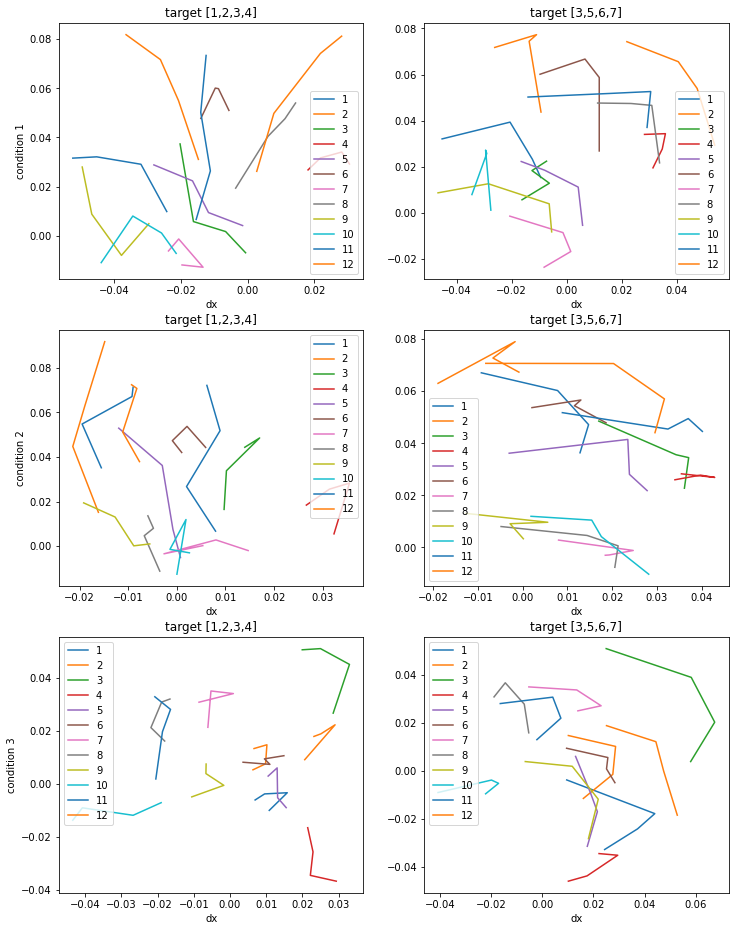

In [40]:
fig, ax = plt.subplots(3, 2, figsize=(12,16))

for i, (j, grp) in enumerate(data0.groupby(['user', 'condition'])):
    user = j[0]
    condition = j[1]
    
    tmp = select(grp, target=[1,2,3,4])
    tmp.plot(x='dx', y='dy', ax=ax[condition-1, 0], label=user)

    tmp = select(grp, target=[3,5,6,7])
    tmp.plot(x='dx', y='dy', ax=ax[condition-1, 1], label=user)

    ax[condition-1, 0].set_title("target [1,2,3,4]")
    ax[condition-1, 1].set_title("target [3,5,6,7]")
    ax[condition-1, 0].set_ylabel("condition {}".format(condition))

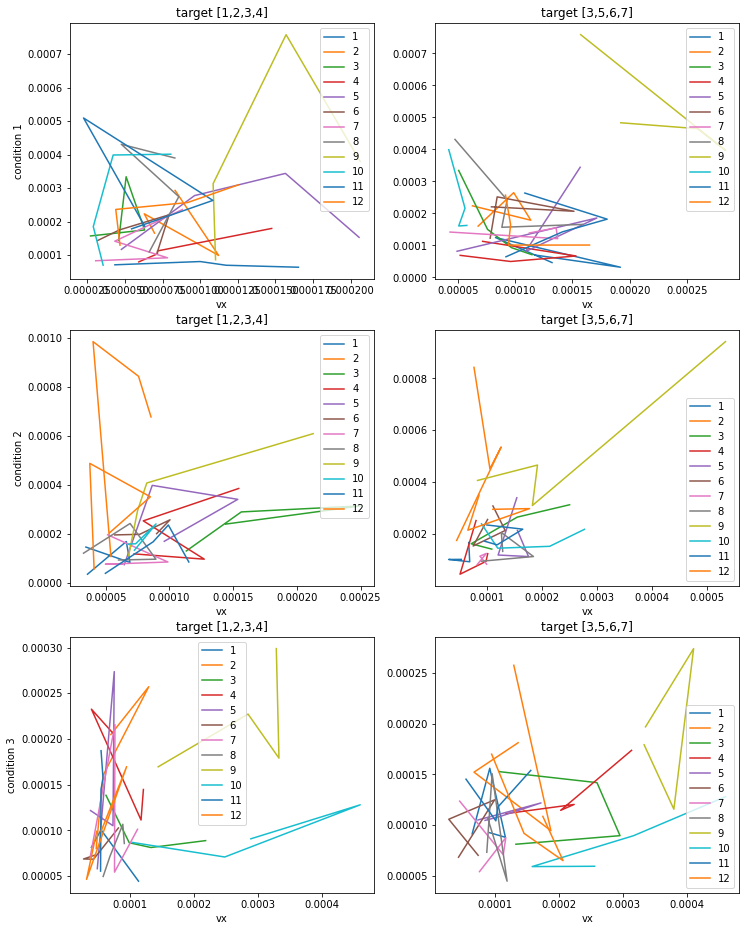

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(12,16))

for i, (j, grp) in enumerate(data0.groupby(['user', 'condition'])):
    user = j[0]
    condition = j[1]
    
    tmp = select(grp, target=[1,2,3,4])
    tmp.plot(x='vx', y='vy', ax=ax[condition-1, 0], label=user)

    tmp = select(grp, target=[3,5,6,7])
    tmp.plot(x='vx', y='vy', ax=ax[condition-1, 1], label=user)

    ax[condition-1, 0].set_title("target [1,2,3,4]")
    ax[condition-1, 1].set_title("target [3,5,6,7]")
    ax[condition-1, 0].set_ylabel("condition {}".format(condition))

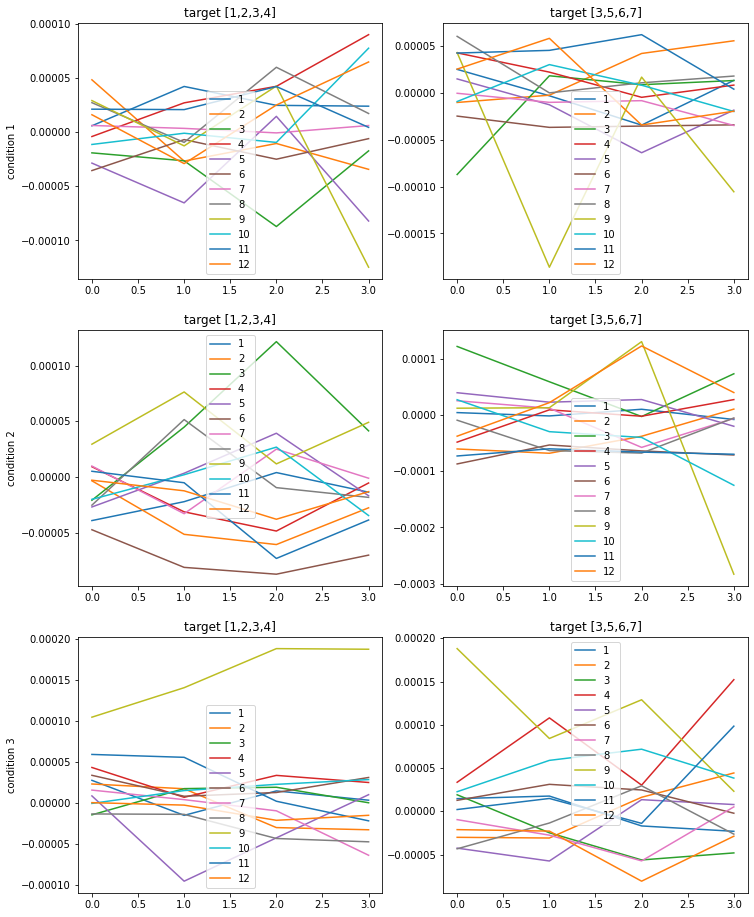

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(12,16))

for i, (j, grp) in enumerate(data0.groupby(['user', 'condition'])):
    user = j[0]
    condition = j[1]
    
    tmp = select(grp, target=[1,2,3,4])
    tmp.plot(y='cxy', ax=ax[condition-1, 0], label=user, use_index=False)

    tmp = select(grp, target=[3,5,6,7])
    tmp.plot(y='cxy', ax=ax[condition-1, 1], label=user, use_index=False)

    ax[condition-1, 0].set_title("target [1,2,3,4]")
    ax[condition-1, 1].set_title("target [3,5,6,7]")
    ax[condition-1, 0].set_ylabel("condition {}".format(condition))

# Plot data experiment 2

In [49]:
df1['da'] = df1['a+'] - df1['a-']

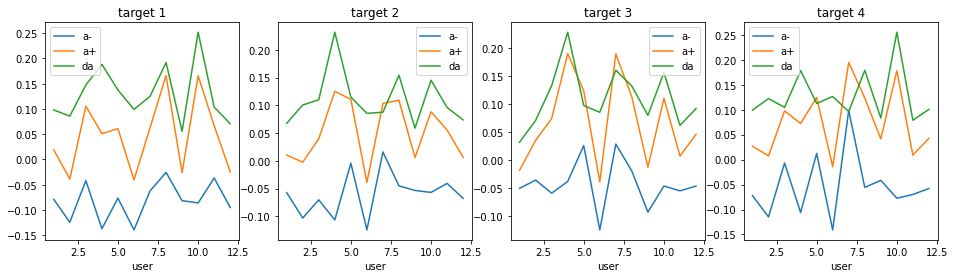

In [50]:
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs = axs.flatten()

for i, grp in df1.groupby('target'):
    ax = axs[i-1]
    grp.plot(x='user', y='a-', ax=ax)
    
for i, grp in df1.groupby('target'):
    ax = axs[i-1]
    grp.plot(x='user', y='a+', ax=ax)
    
for i, grp in df1.groupby('target'):
    ax = axs[i-1]
    grp.plot(x='user', y='da', ax=ax)
    ax.set_title("target {}".format(i))

We find that a+ and a- seem to be correlated across users and targets.

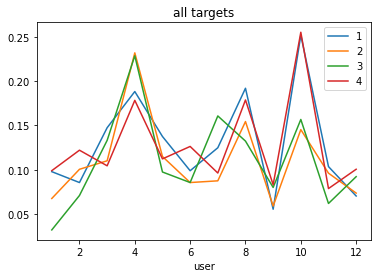

In [55]:
fig, ax = plt.subplots()

for i, grp in df1.groupby('target'):
    grp.plot(x='user', y='da', ax=ax, label=i)
    ax.set_title("all targets")

This picture makes me feel that the value for alpha is independent of the target. In other words, the position at which the illusion occurs does not play a role on its validity - in the conditions of the experiment.

<AxesSubplot:>

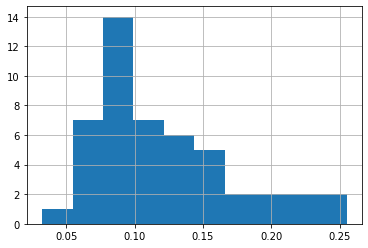

In [54]:
df1['da'].hist()

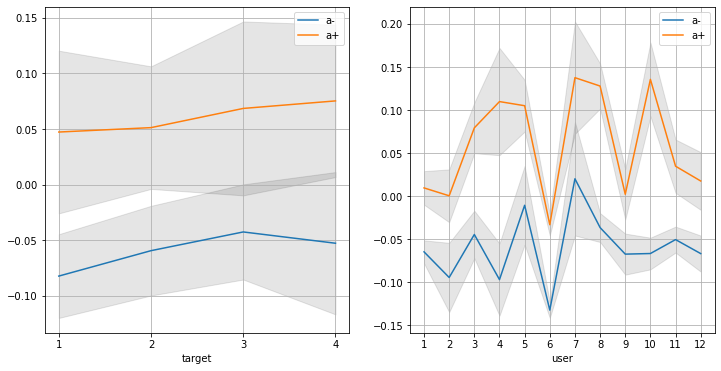

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# target on alpha
means = df1.groupby('target')[['a-', 'a+']].mean()
stds = df1.groupby('target')[['a-', 'a+']].std()

means.plot(ax=ax[0])
ax[0].fill_between(np.arange(1,5), means['a-']-stds['a-'], means['a-']+stds['a-'], color='k', alpha=0.1)
ax[0].fill_between(np.arange(1,5), means['a+']-stds['a+'], means['a+']+stds['a+'], color='k', alpha=0.1)
ax[0].set_xticks(np.arange(1,5))
ax[0].grid()

# user on alpha
means = df1.groupby('user')[['a-', 'a+']].mean()
stds = df1.groupby('user')[['a-', 'a+']].std()

means.plot(ax=ax[1])
ax[1].fill_between(np.arange(1,13), means['a-']-stds['a-'], means['a-']+stds['a-'], color='k', alpha=0.1)
ax[1].fill_between(np.arange(1,13), means['a+']-stds['a+'], means['a+']+stds['a+'], color='k', alpha=0.1)
ax[1].set_xticks(np.arange(1,13))
ax[1].grid()

There does not seem to be a clear effect of target on alpha, as the mean over user is very noisy. There is however a strong user dependence on the value of alpha.

# relation between pointing performance and alpha?

Given the structure of the data in terms of dependence of alpha against target and user, it seems more interesting to attempt to model the relationship between alpha and users.

In [57]:
for i, grp in select(data0, condition=[1,2]).groupby('user'):

,target,condition,user,dx,dy,vx,vy,cxy
0,1,1,1,-0.024262,0.009825,0.000043,0.000071,0.000006
1,1,1,2,-0.014780,0.031079,0.000083,0.000294,0.000048
2,1,1,3,-0.000615,-0.006961,0.000027,0.000157,-0.000019
3,1,1,4,0.018119,0.026791,0.000059,0.000080,-0.000004
4,1,1,5,-0.001510,0.004122,0.000048,0.000117,-0.000029
...,...,...,...,...,...,...,...,...
235,7,2,8,0.020622,-0.007657,0.000128,0.000134,-0.000006
236,7,2,9,0.000158,0.003319,0.000533,0.000941,-0.000283
237,7,2,10,0.028197,-0.010306,0.000277,0.000219,-0.000125
238,7,2,11,0.040195,0.044592,0.000095,0.000173,-0.000070


In [70]:
a = df1.groupby('user').mean()['da']
a

user
1     0.074246
2     0.094863
3     0.123827
4     0.206715
5     0.115619
6     0.099167
7     0.117397
8     0.164356
9     0.069519
10    0.202228
11    0.085215
12    0.084302
Name: da, dtype: float64

In [71]:
b = select(data0, condition=3).groupby('user').mean()[['dx', 'dy']].apply(np.linalg.norm, axis=1)
b

user
1     0.025443
2     0.015996
3     0.053483
4     0.040484
5     0.018085
6     0.017686
7     0.029972
8     0.029681
9     0.005920
10    0.028346
11    0.023268
12    0.035755
dtype: float64

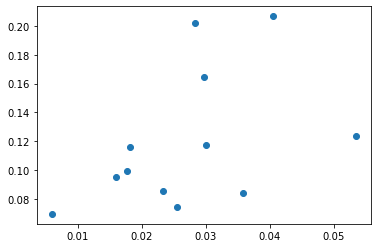

In [73]:
plt.scatter(b, a)

In [74]:
c = select(data0, condition=1).groupby('user').mean()[['dx', 'dy']].apply(np.linalg.norm, axis=1)

In [76]:
d = select(data0, condition=2).groupby('user').mean()[['dx', 'dy']].apply(np.linalg.norm, axis=1)

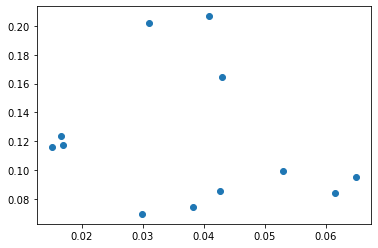

In [90]:
plt.scatter(c, a)

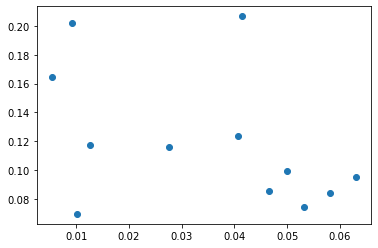

In [92]:
plt.scatter(d, a)

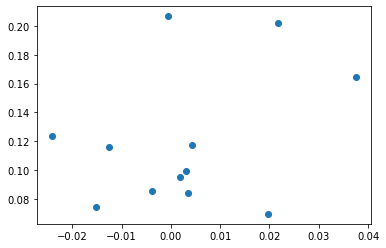

In [93]:
plt.scatter(c-d, a)

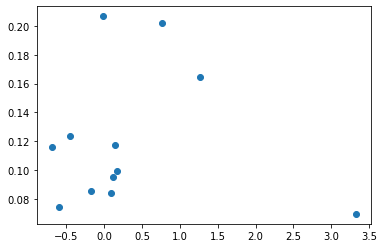

In [94]:
plt.scatter((c-d)/b, a)

In [84]:
np.corrcoef(a, c-d)

array([[1.        , 0.33473631],
       [0.33473631, 1.        ]])

In [85]:
np.corrcoef(a, b / (c-d))

array([[ 1.        , -0.57556908],
       [-0.57556908,  1.        ]])

In [86]:
np.corrcoef(a, b)

array([[1.        , 0.45462408],
       [0.45462408, 1.        ]])